# Model Training

* Importing Libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import warnings

* Import the CSV Data as Pandas DataFrame

In [330]:
df = pd.read_csv('DATA/processed_data.csv')

* Show Top 5 Records

In [331]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,High_BP,Low_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


## 1. X (Independent) and y (Dependent) variables

In [332]:
# Identify features and target
X = df.drop(columns=['Person ID', 'Sleep Disorder'])
y = df['Sleep Disorder']

## 2. Standardizing Independent Variables

### 2.1 Splitting Categorical and Numerical Columns

In [333]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

categorical_cols,numerical_cols

(Index(['Gender', 'Occupation', 'BMI Category'], dtype='object'),
 Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
        'Stress Level', 'Heart Rate', 'Daily Steps', 'High_BP', 'Low_BP'],
       dtype='object'))

### 2.1.1 Encoding Categorical Variables

#### 2.1.1.1 Encoding Gender & Occupation (LabelEncoder)

In [334]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_cols:
    if col != 'BMI Category':  
        X[col] = label_encoder.fit_transform(X[col])


* Reason: With only two categories, Label Encoding is simple and effective, converting 'Male' and 'Female' into binary values (e.g., 0 and 1). This works well, especially if there’s no need to treat these as nominal features in a model like linear regression.

* Reason: Occupations are nominal categories with no inherent order. Since the number of unique occupations is moderate, Label Encoding will effectively capture the categorical information without imposing any ordinal relationship.

* Reason: Sleep Disorders are nominal categories with no inherent order. Label Encoding ensures that no artificial ordinal relationship is imposed, which is important for maintaining the integrity of the data in models that don’t assume order.

#### 2.1.1.2 Encoding BMI Category (Ordinal Mapping)

In [335]:
ordinal_mapping = {
    'Normal Weight': 1,
    'Normal': 2,
    'Overweight': 3,
    'Obese': 4
}
X['BMI Category'] = X['BMI Category'].map(ordinal_mapping)

* Reason: BMI categories have a clear ordinal relationship (Normal < Overweight < Obese). Ordinal Encoding preserves this order, which can be beneficial for models that can leverage the ordinal nature of the data.

In [336]:
print(X.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             2          75   
2                       60             8             2          75   
3                       30             8             4          85   
4                       30             8             4          85   

   Daily Steps  High_BP  Low_BP  
0         4200    126.0    83.0  
1        10000    125.0    80.0  
2        10000    125.0    80.0  
3         3000    140.0    90.0  
4         3000    140.0 

### 2.2 Encoding Numerical Variables

In [337]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verify the changes
print(X.head())

   Gender       Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1 -1.753096           9       -1.298887         -1.098280   
1       1 -1.637643           1       -1.173036         -1.098280   
2       1 -1.637643           1       -1.173036         -1.098280   
3       1 -1.637643           6       -1.550588         -2.771424   
4       1 -1.637643           6       -1.550588         -2.771424   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                -0.825418      0.347021             3    1.654719   
1                 0.039844      1.475592             2    1.170474   
2                 0.039844      1.475592             2    1.170474   
3                -1.402260      1.475592             4    3.591698   
4                -1.402260      1.475592             4    3.591698   

   Daily Steps   High_BP    Low_BP  
0    -1.619584 -0.330002 -0.268102  
1     1.970077 -0.459239 -0.755640  
2     1.970077 -0.459239 -0.755640  
3    -2.362273  

## 3. Standardizing Dependent Variable 

In [338]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(y)

[1 1 1 2 2 0 0 1 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 2 2 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 2 2 2 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


## 4. Checking for outliers after performing Encoding techniques.

**Outlier Detection Strategy**
* Some columns, like Heart Rate, Daily Steps, and Sleep Duration, might have outliers that could impact model performance.
* We can identify outliers using methods like the Interquartile Range (IQR) and then decide whether to remove or transform these values.

In [339]:
def detect_outliers_iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        num_outliers = np.sum(is_outlier)
        print(f"{col}:{num_outliers}")
    
    return detect_outliers_iqr

outliers_iqr_summary = detect_outliers_iqr(X[numerical_cols])

Age:0
Sleep Duration:0
Quality of Sleep:0
Physical Activity Level:0
Stress Level:0
Heart Rate:15
Daily Steps:0
High_BP:0
Low_BP:0


* As we can see outliers in the column 'Heart Rate'. For more clarity lets visualize it

### 4.1 Visualizing Outliers

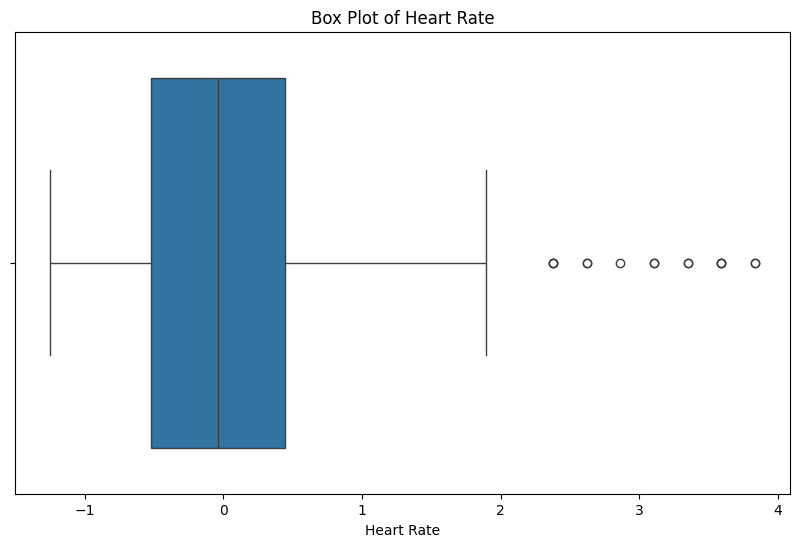

In [340]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['Heart Rate'])
plt.title('Box Plot of Heart Rate')
plt.xlabel('Heart Rate')
plt.show()


* Lets cap the outliers in the dataset manually using **IQR method**.

### 4.2 Capping Outliers using IQR Method

In [341]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

def detect_remaining_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
    return df[is_outlier]


X = cap_outliers(X, 'Heart Rate')
remaining_outliers = detect_remaining_outliers(X, 'Heart Rate')
print(f"The number of outliers remaining are: {len(remaining_outliers)}")


The number of outliers remaining are: 0


In [342]:
X.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,High_BP,Low_BP
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,3,1.654719,-1.619584,-0.330002,-0.268102
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,2,1.170474,1.970077,-0.459239,-0.755640
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,2,1.170474,1.970077,-0.459239,-0.755640
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,4,1.896841,-2.362273,1.479309,0.869486
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,4,1.896841,-2.362273,1.479309,0.869486


## 5. Split the data into train and test sets

In [343]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [344]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape), label_encoder.classes_

(((299, 12), (75, 12), (299,), (75,)),
 array(['Insomnia', 'No Sleep Disorder', 'Sleep Apnea'], dtype=object))

### 5.1 Create an Evaluate Function to give all metrics after model Training

In [345]:
# Train and Test metrics
def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

In [346]:
# Classification models
classification_models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression()
}

results = []

for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = evaluate_classification_model(y_train, y_train_pred)
    test_metrics = evaluate_classification_model(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Accuracy': train_metrics[0],
        'Train Precision': train_metrics[1],
        'Train Recall': train_metrics[2],
        'Train F1 Score': train_metrics[3],
        'Test Accuracy': test_metrics[0],
        'Test Precision': test_metrics[1],
        'Test Recall': test_metrics[2],
        'Test F1 Score': test_metrics[3]
    })

In [347]:
# Creating DataFrame sorting based on F1 Score
df_results = pd.DataFrame(results).sort_values(by='Test F1 Score', ascending=False)

In [348]:
df_results

,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score
1,Random Forest Classifier,0.929766,0.929761,0.929766,0.929697,0.946667,0.948381,0.946667,0.945882
2,Gradient Boosting Classifier,0.926421,0.926476,0.926421,0.926424,0.946667,0.948381,0.946667,0.945882
3,K-Neighbors Classifier,0.892977,0.894152,0.892977,0.893423,0.920000,0.923430,0.920000,0.920683
4,SVC,0.886288,0.890366,0.886288,0.887169,0.906667,0.913871,0.906667,0.907741
0,Decision Tree Classifier,0.929766,0.930644,0.929766,0.929967,0.906667,0.908382,0.906667,0.907171
5,Logistic Regression,0.909699,0.909452,0.909699,0.909512,0.906667,0.906570,0.906667,0.905955


In [349]:
import plotly.express as px

fig = px.bar(df_results, 
             x='Model', 
             y=['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 
                'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'],
             title='Model Evaluation Metrics',
             labels={'value': 'Score', 'Model': 'Classification Model'},
             hover_name='Model',
             text_auto=True,
             barmode='group')

fig.update_layout(
    xaxis_title='Classification Model',
    yaxis_title='Score',
    xaxis_tickangle=-45,
    legend_title='Metrics',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

### 5.2 Hyperparameter Tuning

In [350]:
# Define parameter grids for each model
param_grids = {
    "Decision Tree Classifier": {
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    "Random Forest Classifier": {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting Classifier": {
        'clf__n_estimators': [100, 200, 300],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 4, 5]
    },
    "K-Neighbors Classifier": {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    },
    "SVC": {
        'clf__C': [0.1, 1, 10],
        'clf__gamma': [0.001, 0.01, 0.1, 1],
        'clf__kernel': ['linear', 'rbf']
    },
    "Logistic Regression": {
        'clf__C': [0.1, 1, 10],
        'clf__solver': ['liblinear', 'lbfgs'],
        'clf__penalty': ['l2']
    }
}

In [351]:
tuned_results = []

for name, model in classification_models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])
    
    param_grid = param_grids[name]
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Predict on train and test data
    y_train_pred1 = grid_search.best_estimator_.predict(X_train)
    y_test_pred1 = grid_search.best_estimator_.predict(X_test)
    
    # Evaluate performance
    train_metrics1 = evaluate_classification_model(y_train, y_train_pred1)
    test_metrics1 = evaluate_classification_model(y_test, y_test_pred1)
    
    tuned_results.append({
        'Model': name,
        'Best Params': best_params,
        'Train Accuracy': train_metrics1[0],
        'Train Precision': train_metrics1[1],
        'Train Recall': train_metrics1[2],
        'Train F1 Score': train_metrics1[3],
        'Test Accuracy': test_metrics1[0],
        'Test Precision': test_metrics1[1],
        'Test Recall': test_metrics1[2],
        'Test F1 Score': test_metrics1[3],
        'Best F1 Score (Train)': best_score
    })

# Creating DataFrame sorting based on Test F1 Score
df_tuned_results = pd.DataFrame(tuned_results).sort_values(by='Test F1 Score', ascending=False)

df_tuned_results


,Model,Best Params,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Best F1 Score (Train)
1,Random Forest Classifier,"{'clf__max_depth': None, 'clf__min_samples_lea...",0.929766,0.929761,0.929766,0.929697,0.946667,0.948381,0.946667,0.945882,0.916167
2,Gradient Boosting Classifier,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",0.929766,0.929761,0.929766,0.929697,0.946667,0.948381,0.946667,0.945882,0.906794
4,SVC,"{'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...",0.926421,0.926453,0.926421,0.926413,0.946667,0.948381,0.946667,0.945882,0.902284
3,K-Neighbors Classifier,"{'clf__n_neighbors': 7, 'clf__weights': 'unifo...",0.889632,0.891903,0.889632,0.890468,0.933333,0.935667,0.933333,0.933314,0.871358
5,Logistic Regression,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...",0.906355,0.906434,0.906355,0.906300,0.906667,0.906570,0.906667,0.905955,0.881349
0,Decision Tree Classifier,"{'clf__criterion': 'gini', 'clf__max_depth': 3...",0.919732,0.921867,0.919732,0.920086,0.893333,0.897941,0.893333,0.894265,0.893072


In [352]:
fig = px.bar(df_tuned_results, 
             x='Model', 
             y=['Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score', 
                'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'],
             title='Model Evaluation Metrics',
             labels={'value': 'Score', 'Model': 'Classification Model'},
             hover_name='Model',
             text_auto=True,
             barmode='group')

fig.update_layout(
    xaxis_title='Classification Model',
    yaxis_title='Score',
    xaxis_tickangle=-45,
    legend_title='Metrics',
    hovermode='x unified',
    template='plotly_white'
)

fig.show()

### 5.3 Model Performance Summary

#### 5.3.1 Top Performers
- **Random Forest Classifier**
- **Gradient Boosting Classifier**

Both models excel with:
- **Test Accuracy:** 94.67%
- **Precision:** 94.84%
- **Recall:** 94.67%
- **F1 Score:** Highest among models

These models are effective at distinguishing classes and handle class imbalance well. They also generalize well to new data without overfitting.

#### 5.3.2 Balanced Performance
- **Consistent Results:** Both Random Forest and Gradient Boosting show strong performance across training and testing datasets.

#### 5.3.3 Good but Slightly Weaker Models
- **K-Neighbors Classifier**
- **SVC**

While competitive, these models have:
- **Lower Accuracy and F1 Score** than the top performers.

#### 5.3.4 Lowest Performers
- **Decision Tree Classifier**
- **Logistic Regression**

- **Decision Tree:** Decent performance but lower F1 Score.
- **Logistic Regression:** Lowest F1 Score despite competitive accuracy.

#### 5.3.5 Overall Recommendation
- **For balanced performance and high accuracy:** Use Random Forest or Gradient Boosting.
- **For model interpretability and simplicity:** Consider Decision Trees or Logistic Regression, but note they may not balance precision and recall as well.